<a href="https://colab.research.google.com/github/mcfardc/AERO-7970/blob/main/HW2_P4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW 2 Problem 4
This code performs a kinetic analysis on H2-O2 reaction

In [4]:
!pip install cantera
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

# H2-O2 Constant Pressure Reactor
Pressure is varied from .001 to 10 atm

Temperature is kept at initial value of 900 K


  ohmech:

       temperature   900 K
          pressure   101.33 Pa
           density   0.00035766 kg/m^3
  mean mol. weight   26.414 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy        6.8984e+05        1.8221e+07  J
   internal energy        4.0654e+05        1.0738e+07  J
           entropy             10666        2.8174e+05  J/K
    Gibbs function       -8.9099e+06       -2.3534e+08  J
 heat capacity c_p            1213.8             32061  J/K
 heat capacity c_v            899.04             23747  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                H2         0.0050883          0.066667           -26.866
                O2          0.040381          0.033333           -36.595
                N2           0.95453               0.9           -31.599

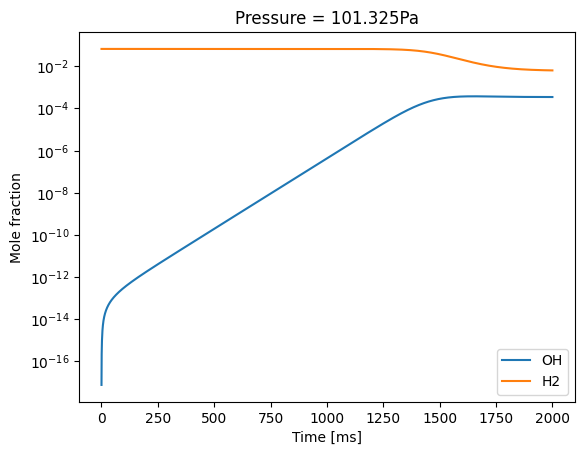

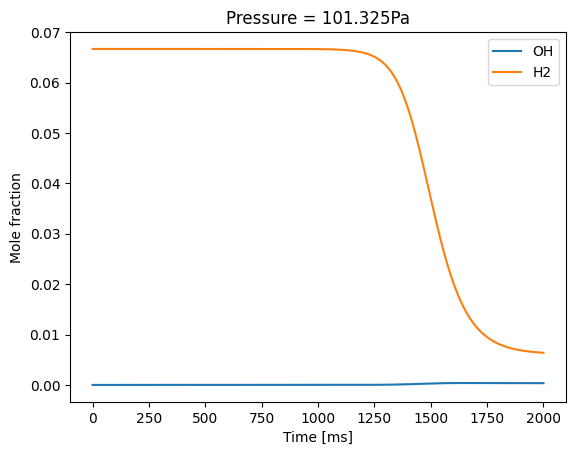

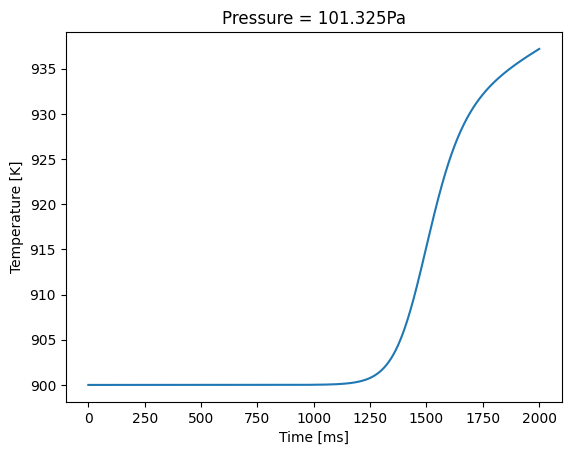

Maximum OH concentration: 0.0003764311143975749
Ignition delay time: 1650.7999999998347 ms

  ohmech:

       temperature   900 K
          pressure   1013.3 Pa
           density   0.0035766 kg/m^3
  mean mol. weight   26.414 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy        6.8984e+05        1.8221e+07  J
   internal energy        4.0654e+05        1.0738e+07  J
           entropy            9941.6        2.6259e+05  J/K
    Gibbs function       -8.2576e+06       -2.1811e+08  J
 heat capacity c_p            1213.8             32061  J/K
 heat capacity c_v            899.04             23747  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                H2         0.0050883          0.066667           -24.563
                O2          0.040381          0.033333 

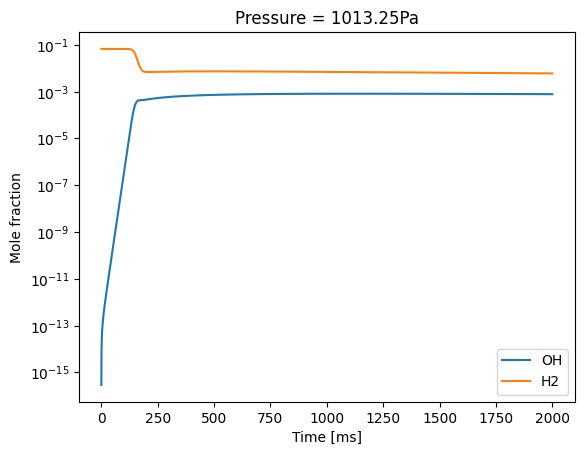

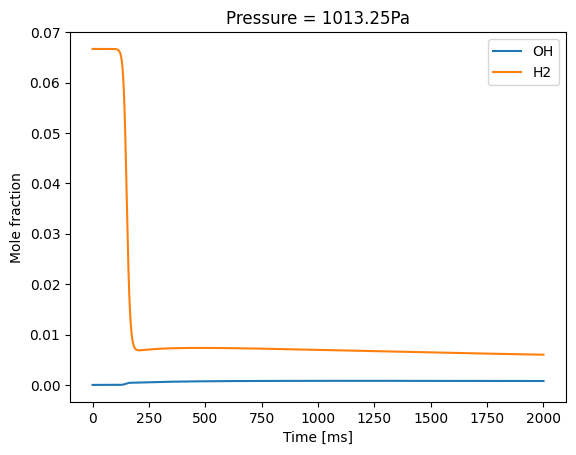

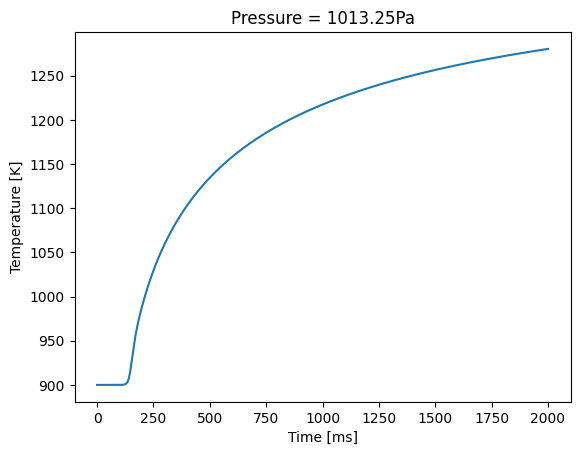

Maximum OH concentration: 0.0008124761198460912
Ignition delay time: 1147.2999999998901 ms

  ohmech:

       temperature   900 K
          pressure   10132 Pa
           density   0.035766 kg/m^3
  mean mol. weight   26.414 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy        6.8984e+05        1.8221e+07  J
   internal energy        4.0654e+05        1.0738e+07  J
           entropy            9216.8        2.4345e+05  J/K
    Gibbs function       -7.6052e+06       -2.0088e+08  J
 heat capacity c_p            1213.8             32061  J/K
 heat capacity c_v            899.04             23747  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                H2         0.0050883          0.066667           -22.261
                O2          0.040381          0.033333   

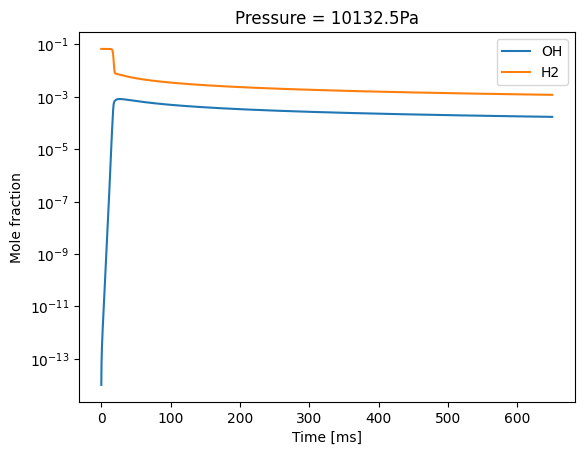

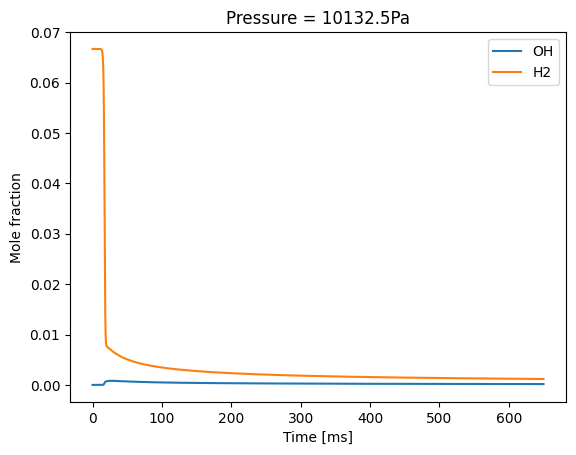

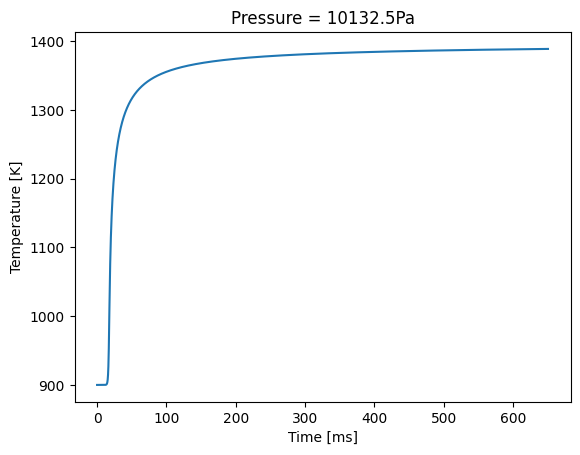

Maximum OH concentration: 0.0008159783744336338
Ignition delay time: 26.799999999999894 ms

  ohmech:

       temperature   900 K
          pressure   1.0133e+05 Pa
           density   0.35766 kg/m^3
  mean mol. weight   26.414 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy        6.8984e+05        1.8221e+07  J
   internal energy        4.0654e+05        1.0738e+07  J
           entropy              8492         2.243e+05  J/K
    Gibbs function       -6.9529e+06       -1.8365e+08  J
 heat capacity c_p            1213.8             32061  J/K
 heat capacity c_v            899.04             23747  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                H2         0.0050883          0.066667           -19.958
                O2          0.040381          0.03333

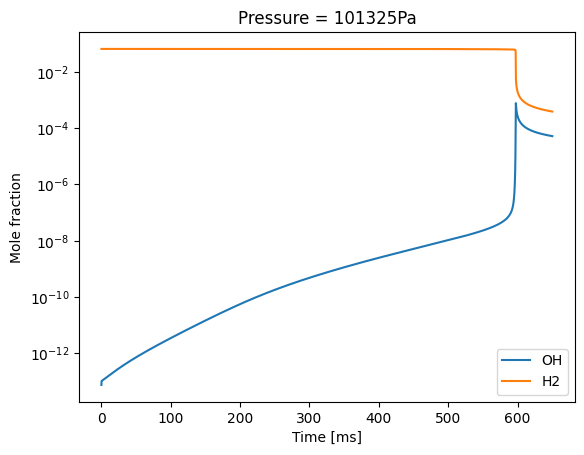

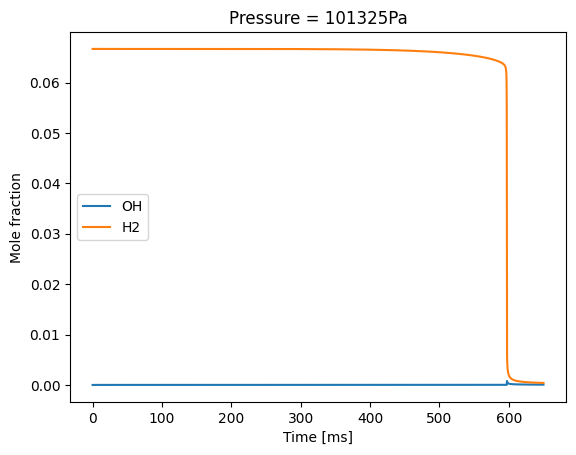

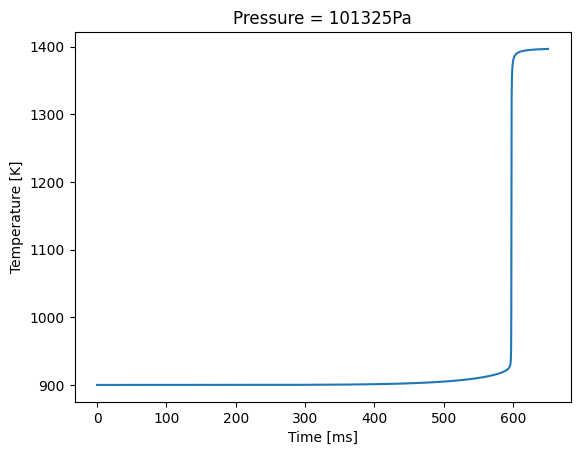

Maximum OH concentration: 0.0007823318875385015
Ignition delay time: 597.4999999999505 ms

  ohmech:

       temperature   900 K
          pressure   1.0133e+06 Pa
           density   3.5766 kg/m^3
  mean mol. weight   26.414 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy        6.8984e+05        1.8221e+07  J
   internal energy        4.0654e+05        1.0738e+07  J
           entropy            7767.1        2.0516e+05  J/K
    Gibbs function       -6.3006e+06       -1.6642e+08  J
 heat capacity c_p            1213.8             32061  J/K
 heat capacity c_v            899.04             23747  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                H2         0.0050883          0.066667           -17.655
                O2          0.040381          0.033333 

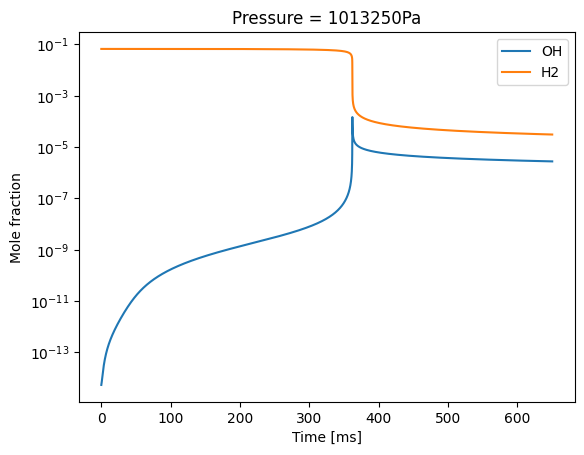

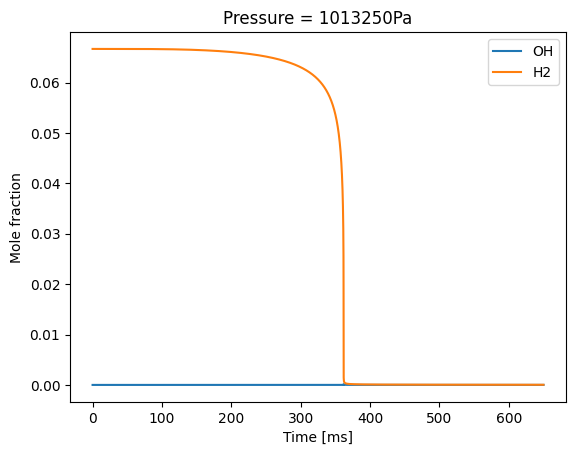

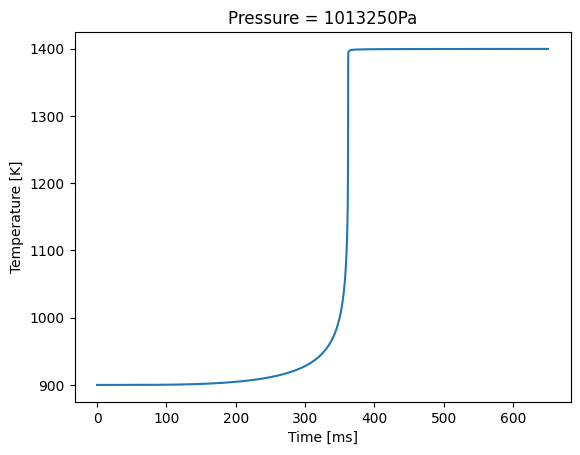

Maximum OH concentration: 0.00014650639794393456
Ignition delay time: 361.99999999997647 ms


In [5]:
# Set up gas object
gas = ct.Solution('h2o2.yaml') # THIS MECHANISM IS A SUBSET OF GRI30
pressure = [101.325, 1013.25, 10132.5, 101325, 1013250]
for i in pressure:
  gas.TPX = 900, i, 'H2:2, O2:1, N2:27'
  gas()
  # Set up reactor object
  reactor = ct.IdealGasConstPressureReactor(gas)

  # For time-marching solution, use reactor network
  sim = ct.ReactorNet([reactor])

  # Time step and maximum integration time
  # Max integration time is reduced for higher pressures
  dt_max = 1e-4
  if i < 10132.5:
    t_end = 20000*dt_max
    states = ct.SolutionArray(gas, extra=['t'])
  else:
    t_end = 6500*dt_max
    states = ct.SolutionArray(gas, extra=['t'])

  # Print header
  #print('{:12s} {:10s} {:10s} {:14s}'.format(
          #'t [s]', 'T [K]', 'P [Pa]', 'u [kJ/kg]'))

  # Advance simulation each timestep
  while sim.time < t_end:
      sim.advance(sim.time + dt_max)
      states.append(reactor.thermo.state, t=sim.time*1e3)

      #print('{:10.3e} {:10.3f} {:10.3f} {:14.2f}'.format(
              #sim.time, reactor.T, reactor.thermo.P, reactor.thermo.u/1000))

  # Plot OH and H2 concentration vs time on logy scale
  plt.semilogy(states.t, states.X[:,gas.species_index('OH')])
  plt.semilogy(states.t, states.X[:,gas.species_index('H2')])
  plt.xlabel('Time [ms]')
  plt.ylabel('Mole fraction')
  plt.legend(['OH','H2'])
  plt.title('Pressure = '+ str(i) + 'Pa')
  plt.show()

  # plot OH and H2 concentration vs time
  plt.plot(states.t, states.X[:,gas.species_index('OH')])
  plt.plot(states.t, states.X[:,gas.species_index('H2')])
  plt.xlabel('Time [ms]')
  plt.ylabel('Mole fraction')
  plt.legend(['OH','H2'])
  plt.title('Pressure = '+ str(i) + 'Pa')
  plt.show()

  # Plot the temp vs time
  plt.plot(states.t, states.T)
  plt.xlabel('Time [ms]')
  plt.ylabel('Temperature [K]')
  plt.title('Pressure = '+ str(i) + 'Pa')
  plt.show()

  # Display Ignition delay time at specified pressure
  max_OH = np.max(states.X[:,gas.species_index('OH')])
  print('Maximum OH concentration: ' + str(max_OH))
  max_OH_index = np.argmax(states.X[:,gas.species_index('OH')])
  Ignition_time = states.t[max_OH_index]
  print('Ignition delay time: ' + str(Ignition_time) + ' ms')

Plot of concentrations of major products vs time when  pressure is at  10 atm

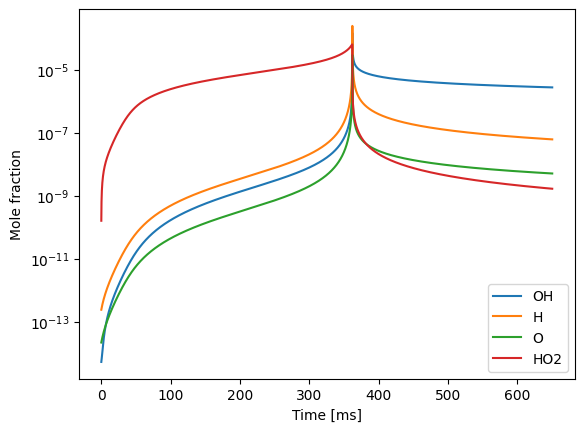

In [6]:
species_names = 'OH', 'H', 'O', 'HO2'

for species in species_names:
    plt.semilogy(states.t, states.X[:,gas.species_index(species)], label = species)
plt.legend()
plt.xlabel('Time [ms]')
plt.ylabel('Mole fraction')
plt.show()